许多测量涉及多个传感器异步采集的数据。如果您要集成信号并以关联式研究它们，您必须同步它们。

例如，假设有一辆汽车经过一座桥。它产生的振动由位于不同位置的三个相同传感器进行测量。信号有不同到达时间。

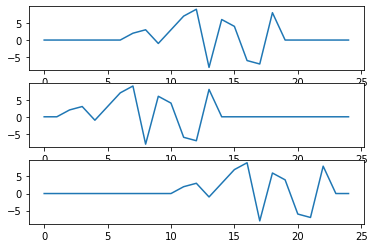

In [68]:
import numpy as np  
import matplotlib.pyplot as plt 

x = np.arange(0,25) 
y1=[0,0,0,0,0,0,0,2,3,-1,3,7,9,-8,6,4,-6,-7,8,0,0,0,0,0,0]
y2=[0,0,2,3,-1,3,7,9,-8,6,4,-6,-7,8,0,0,0,0,0,0,0,0,0,0,0]
y3=[0,0,0,0,0,0,0,0,0,0,0,2,3,-1,3,7,9,-8,6,4,-6,-7,8,0,0]
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(x,y1) 
ax1 = fig.add_subplot(312)
ax1.plot(x,y2) 
ax1 = fig.add_subplot(313)
ax1.plot(x,y3) 
plt.show()

计算三对信号之间的互相关性。将它们归一化，使其最大值为 1。

In [69]:
cq12=np.correlate(y1,y2,'full')
cq13=np.correlate(y1,y3,'full')
cq23=np.correlate(y2,y3,'full')
c12=cq12/max(cq12)
c13=cq13/max(cq13)
c23=cq23/max(cq23)

互相关性最大值的位置指示领先或滞后时间。

In [70]:
t12=np.argmax(c12)-len(y1)+1
t13=np.argmax(c13)-len(y1)+1
t23=np.argmax(c23)-len(y2)+1

绘制互相关图。在每个绘图中显示最大值的位置。

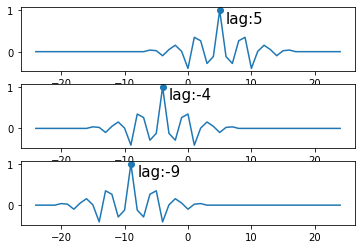

In [71]:
x1 = np.arange(-len(y1)+1,len(y2)) 
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(x1,c12) 
plt.scatter(t12,1)
plt.text(t12+1,1-0.3, 'lag:%i'%t12,fontsize=15)
ax1 = fig.add_subplot(312)
ax1.plot(x1,c13) 
plt.scatter(t13,1)
plt.text(t13+1,1-0.3, 'lag:%i'%t13,fontsize=15)
ax1 = fig.add_subplot(313)
ax1.plot(x1,c23) 
plt.scatter(t23,1)
plt.text(t23+1,1-0.3, 'lag:%i'%t23,fontsize=15)
plt.show()

通过截断具有较长延迟的向量来对齐信号。

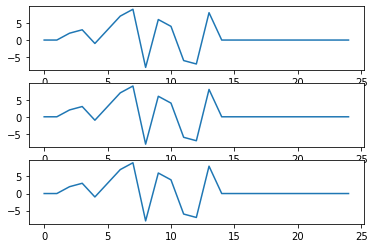

In [72]:
y1 = y1[t12:]
y1+=([0]*t12)
y3 = y3[-t23:]
y3+=[0]*(-t23)
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(x,y1) 
ax1 = fig.add_subplot(312)
ax1.plot(x,y2) 
ax1 = fig.add_subplot(313)
ax1.plot(x,y3) 
plt.show()